# Pairs trading introduction

Pairs Trading is a market-neutral strategy that involves the simultaneous buying (going long) of one security and selling (going short) of another related security in a predetermined ratio. The idea is to exploit the price relationship between the two securities, known as the "spread," which is calculated using the quoted prices of the two assets and forms a time series.

## Key Types of Pairs Trading:

### 1. Statistical Arbitre Pairs Trading
- This strategy is based on the concept of relative pricing, where stocks with similar characteristics are expected to be priced similarly.
- The spread in this case represents the degree of mutual mispricing between the two stocks. When the spread deviates significantly from its historical mean, the strategy involves taking a long position in the undervalued stock and a short position in the overvalued stock, with the expectation that the spread will revert to its mean.
- The positions are then reversed when the spread returns to the mean, allowing the trader to capture profits fr the correction.

### 2. Risk Ar Pairs Trading
- This strategy is typically used in the context of mergers and acquisitions (M&A). It involves trading on the price relationship between the acquiring company (the "bidder") and the target company.
- When a merger is announced, the trader sells short the stock of the bidder and buys the stock of the target, anticipating that the spread between the two stocks will decrease as the merger progresses toward completion.
- The profit is realized when the merger is completed, and the spread narrows as expected.

## Key Questions and Tools:
- **Spread Calculation**: How to calculate the spread between the two securities.
- **Pair Selection**: How to identify pairs of stocks that are suitable for such a strategy.
- **Ratio Determination**: What ratio to use when constructing the pairs portfolio.
- **Deviation from Mean**: How to determine when the spread has significantly diverged from its mean to trigger a trade.

Pairs Trading is fundamentally about exploiting the price relationship between two correlated assets. The strategy relies on the assumption that the spread between these assets will revert to its historical mean, and the trader can profit from this reversion. Risk management and trade timing are crucial to the successful implementation of Pairs Trading strategies.

Let's consider two stocks, A and B, whose prices are influenced by a common factor 𝐹, along with some noise. Assume that 𝐹 follows a random walk process. The price dynamics for the stocks are given by:

$$
P_{a,t} = F_t + w_{a,t}, \quad w_{a,t} \sim \mathcal{N}(0, 1)
$$

$$
P_{b,t} = F_t + w_{b,t}, \quad w_{b,t} \sim \mathcal{N}(0, 1)
$$

First, we generate the stock price tie series.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(200)

# Generate random walk process for F
n_days = 252
F = np.cumsum(np.random.randn(n_days + 1)) + 50  # Initialize F with 50 and generate the random walk in one step

# Generate price series for P_a and P_b
P_a = F + np.random.randn(len(F))
P_b = F + np.random.randn(len(F))

Now, let's plot the generated stock price series. When examining the price series of two individual stocks, they resemble a random walk, making it challenging to predict future price movements. However, by plotting both series on the same graph, we can observe that their prices often move in tandem.

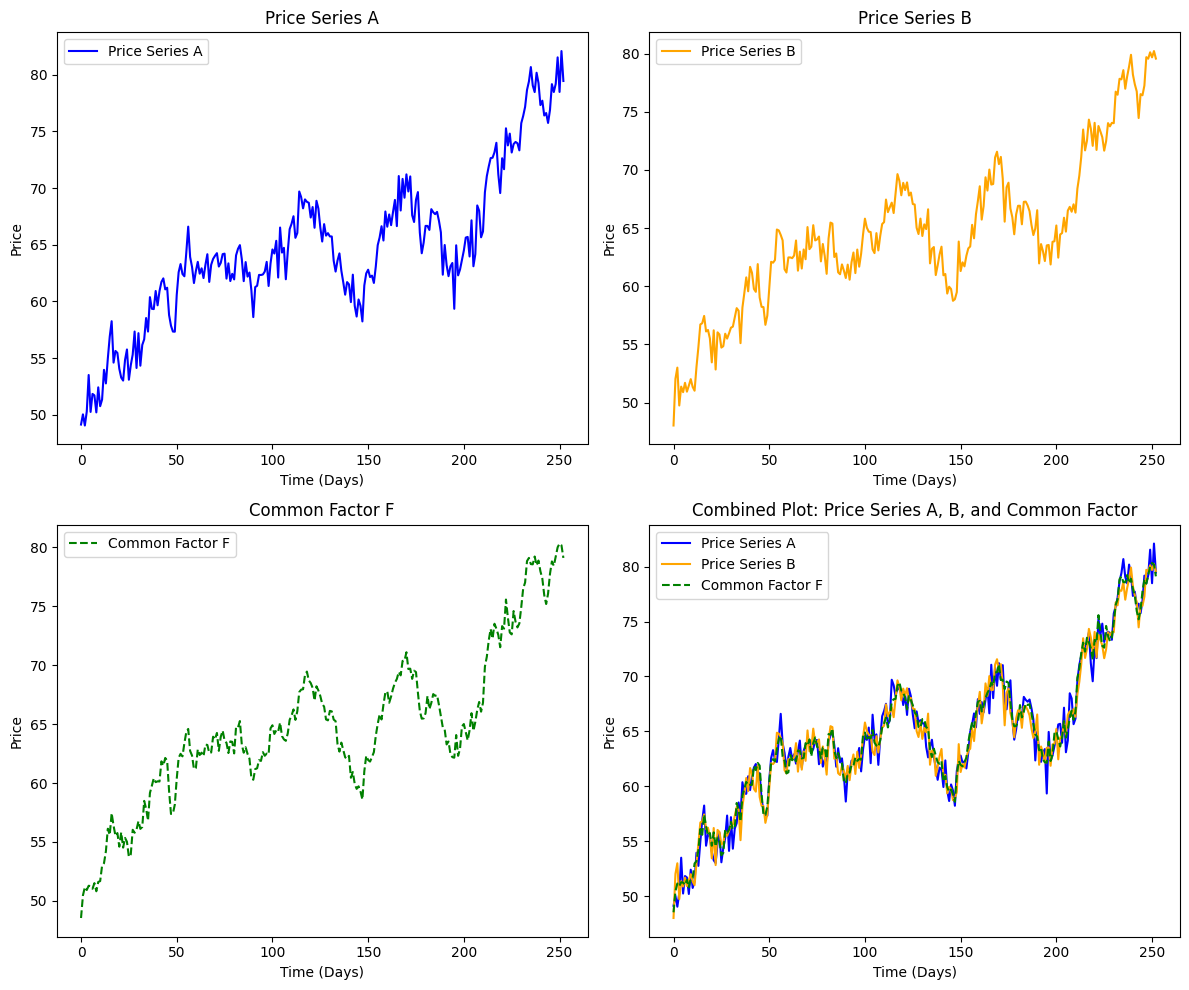

In [7]:
# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot Price Series A
axs[0, 0].plot(P_a, label='Price Series A', color='blue')
axs[0, 0].set_title('Price Series A')
axs[0, 0].set_xlabel('Time (Days)')
axs[0, 0].set_ylabel('Price')
axs[0, 0].legend()

# Plot Price Series B
axs[0, 1].plot(P_b, label='Price Series B', color='orange')
axs[0, 1].set_title('Price Series B')
axs[0, 1].set_xlabel('Time (Days)')
axs[0, 1].set_ylabel('Price')
axs[0, 1].legend()

# Plot Common Factor F
axs[1, 0].plot(F, label='Common Factor F', color='green', linestyle='--')
axs[1, 0].set_title('Common Factor F')
axs[1, 0].set_xlabel('Time (Days)')
axs[1, 0].set_ylabel('Price')
axs[1, 0].legend()

# Plot all together
axs[1, 1].plot(P_a, label='Price Series A', color='blue')
axs[1, 1].plot(P_b, label='Price Series B', color='orange')
axs[1, 1].plot(F, label='Common Factor F', color='green', linestyle='--')
axs[1, 1].set_title('Combined Plot: Price Series A, B, and Common Factor')
axs[1, 1].set_xlabel('Time (Days)')
axs[1, 1].set_ylabel('Price')
axs[1, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Given this observed relationship, we might consider constructing a portfolio that involves going long on stock A while simultaneously shorting stock B. This raises the question: What would the resulting portfolio price look like?

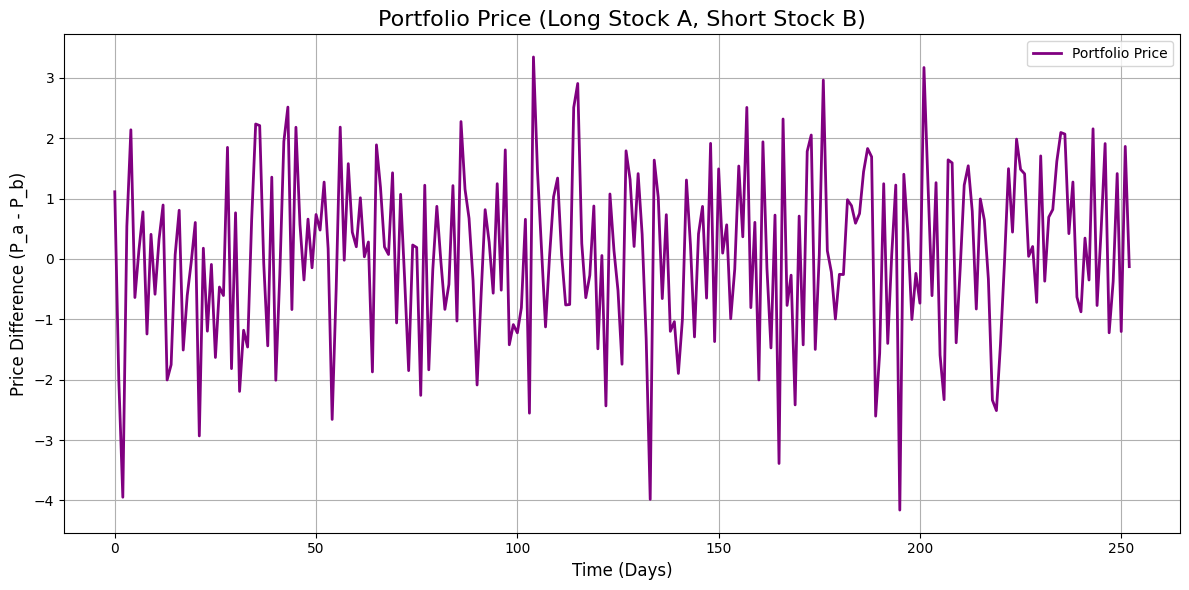

In [8]:
# Calculate the portfolio price as the difference between the two price series
portfolio = P_a - P_b

# Plot the portfolio price
plt.figure(figsize=(12, 6))
plt.plot(portfolio, label='Portfolio Price', color='purple', linewidth=2)

# Enhance the plot
plt.title('Portfolio Price (Long Stock A, Short Stock B)', fontsize=16)
plt.xlabel('Time (Days)', fontsize=12)
plt.ylabel('Price Difference (P_a - P_b)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

We can observe that the resulting time series exhibits mean-reverting behavior, with the portfolio price fluctuating around zero. Essentially, by constructing this portfolio, we have managed to neutralize the random walk component inherent in the individual stock prices, leaving us primarily with the white noise components.

When the portfolio price deviates significantly from zero, we can anticipate a reversion back to the mean. Let's consider opening a position under the following conditions:

- **Initiate a long position** when the portfolio price falls below the mean by more than 2 historical standard deviations.
- **Close the long position** once the portfolio price rises back and crosses the mean from below.
- **Initiate a short position** when the portfolio price rises above the mean by more than 2 historical standard deviations.
- **Close the short position** when the portfolio price drops back and crosses the mean from above.

The following plot shows the portfolio price along with 2-standard deviation bands and the corresponding positions we should take:

- `+1`: long position
- `-1`: short position
- `0` no position


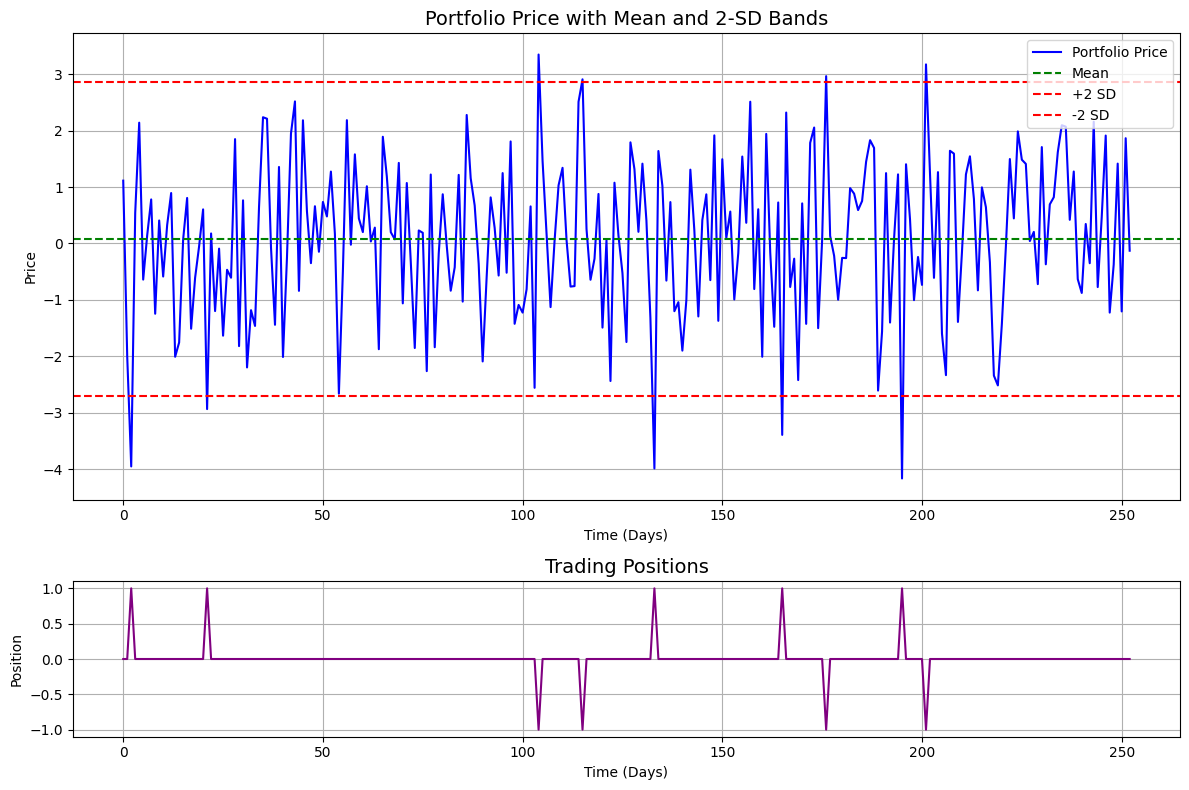

In [9]:
# Calculate portfolio mean and standard deviation
mu = np.mean(portfolio)
sigma = np.std(portfolio)

# Calculate positions
positions = np.zeros_like(portfolio)
positions[portfolio > mu + 2 * sigma] = -1  # short position
positions[portfolio < mu - 2 * sigma] = 1   # long position

# Plot portfolio price and positions
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(12, 8))

# Plot portfolio price with mean and 2 SD bands
ax1.plot(portfolio, label='Portfolio Price', color='blue')
ax1.axhline(y=mu, color='green', linestyle='--', label='Mean')
ax1.axhline(y=mu + 2 * sigma, color='red', linestyle='--', label='+2 SD')
ax1.axhline(y=mu - 2 * sigma, color='red', linestyle='--', label='-2 SD')
ax1.set_title('Portfolio Price with Mean and 2-SD Bands', fontsize=14)
ax1.set_xlabel('Time (Days)')
ax1.set_ylabel('Price')
ax1.legend(loc='upper right')
ax1.grid(True)

# Plot positions
ax2.plot(positions, color='purple')
ax2.set_title('Trading Positions', fontsize=14)
ax2.set_xlabel('Time (Days)')
ax2.set_ylabel('Position')
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Without Transaction Fees**

In [10]:
# Number of trading opportunities (this should ideally be calculated based on actual trading signals)
num_trading_opportunities = 15

# Approximate profit per trade (based on the assumption of 2*sigma profit per trade)
profit_per_trade = 2 * sigma

# Calculate total approximate profit
approx_profit = num_trading_opportunities * profit_per_trade
print(f"Approximate Profit: {approx_profit:.2f}")

Approximate Profit: 41.68


The plot above illustrates that there are 15 trading opportunities. If we were to trade a portfolio containing one share of stock A and one share of stock B, we could potentially earn around $43$ in profit, with an average of $2.87$ per trade. If, instead, we traded a portfolio comprising 100 shares of stock A and 100 shares of stock B, our profits and losses would scale accordingly, resulting in a profit of approximately $4,300$.

This simplified example highlights the fundamental concept of pairs trading. However, in practice, the strategy is far more complex. In subsequent articles, I will explore various techniques for selecting pairs and apply these methods to real-world data.

**With Transaction Fees**

In [12]:
num_trading_opportunities = 15  # Number of trading opportunities
profit_per_trade = 2 * sigma  # Approximate profit per trade
trading_fee_per_trade = 0.1 * profit_per_trade  # Example: 10% of profit per trade as trading fee

# Calculate total approximate profit without fees
gross_profit = num_trading_opportunities * profit_per_trade

# Calculate total trading fees
total_fees = num_trading_opportunities * trading_fee_per_trade

# Calculate net profit after fees
net_profit = gross_profit - total_fees

# Print results
print(f"Gross Profit: {gross_profit:.2f}")
print(f"Total Trading Fees: {total_fees:.2f}")
print(f"Net Profit after Fees: {net_profit:.2f}")

Gross Profit: 41.68
Total Trading Fees: 4.17
Net Profit after Fees: 37.51


**Actual Number of Trading Opportunities**

In [15]:
# Calculate the number of trading opportunities
trade_signals = np.diff(positions)  # Find changes in positions (trading signals)
num_trading_opportunities = np.sum(np.abs(trade_signals) > 0)  # Count the number of trades

# Approximate profit per trade (based on the assumption of 2*sigma profit per trade)
profit_per_trade = 2 * sigma

# Calculate total approximate profit without fees
gross_profit = num_trading_opportunities * profit_per_trade

# Assume trading fee (for example, 10% of profit per trade)
trading_fee_per_trade = 0.1 * profit_per_trade

# Calculate total trading fees
total_fees = num_trading_opportunities * trading_fee_per_trade

# Calculate net profit after fees
net_profit = gross_profit - total_fees

# Print results
print(f"Number of Trading Opportunities: {num_trading_opportunities}")
print(f"Gross Profit: {gross_profit:.2f}")
print(f"Total Trading Fees: {total_fees:.2f}")
print(f"Net Profit after Fees: {net_profit:.2f}")

Number of Trading Opportunities: 18
Gross Profit: 50.02
Total Trading Fees: 5.00
Net Profit after Fees: 45.02


**With the actual Hedge Ratio**

To determine the ratio **𝑟** based on real trading data rather than assuming it, we need to calculate the optimal ratio that balances the two stocks in a way that minimizes risk or achieves a desired portfolio characteristic. This is often done by analyzing historical price data of the two stocks, such as their volatilities or their regression coefficients in a linear regression model.

Here’s how you can calculate the ratio **𝑟** based on the historical relationship between the two stocks:

**Step 1: Calculate the Ratio Based on Historical Data**

One common approach is to use linear regression to determine the relationship between the two stocks. The slope of the regression line can be used as the ratio 𝑟.

In [19]:
from sklearn.linear_model import LinearRegression

# Reshape the price series to fit the model
P_b_reshaped = P_b.reshape(-1, 1)

# Perform linear regression of P_a on P_b
model = LinearRegression().fit(P_b_reshaped, P_a)
r = model.coef_[0]  # The slope of the regression line gives us the ratio

print(f"Calculated ratio (r): {r:.2f}")

Calculated ratio (r): 1.01


**Step 2: Use the Calculated Ratio in Portfolio Construction**

Once you have calculated the ratio 𝑟 based on the historical data, you can proceed with the portfolio construction and trading strategy:

In [21]:
# Calculate the portfolio price considering the calculated ratio
portfolio = P_a - r * P_b

# Calculate portfolio mean and standard deviation
mu = np.mean(portfolio)
sigma = np.std(portfolio)

# Calculate positions
positions = np.zeros_like(portfolio)
positions[portfolio > mu + 2 * sigma] = -1  # short position
positions[portfolio < mu - 2 * sigma] = 1   # long position

# Calculate the number of trading opportunities
trade_signals = np.diff(positions)  # Find changes in positions (trading signals)
num_trading_opportunities = np.sum(np.abs(trade_signals) > 0)  # Count the number of trades

# Approximate profit per trade (considering ratio)
profit_per_trade = 2 * sigma * (1 + r)  # Adjust profit estimate for the ratio

# Calculate total approximate profit without fees
gross_profit = num_trading_opportunities * profit_per_trade

# Assume trading fee (for example, 10% of profit per trade)
trading_fee_per_trade = 0.1 * profit_per_trade

# Calculate total trading fees
total_fees = num_trading_opportunities * trading_fee_per_trade

# Calculate net profit after fees
net_profit = gross_profit - total_fees

# Print results
print(f"Number of Trading Opportunities: {num_trading_opportunities}")
print(f"Gross Profit: {gross_profit:.2f}")
print(f"Total Trading Fees: {total_fees:.2f}")
print(f"Net Profit after Fees: {net_profit:.2f}")


Number of Trading Opportunities: 18
Gross Profit: 100.44
Total Trading Fees: 10.04
Net Profit after Fees: 90.39


We use the LinearRegression model from sklearn to regress the prices of stock A on stock B. The coefficient of the regression (model.coef_[0]) represents the optimal ratio 𝑟, which indicates how much of stock B is needed to hedge against the movements in stock A.

The calculated ratio 𝑟 is then used to construct the portfolio, where the portfolio price is the difference between stock A’s price and the weighted price of stock B.

Trading signals are generated based on the deviation of the portfolio price from its mean, and the number of trading opportunities is calculated based on these signals.

The profit per trade is adjusted for the ratio, and total profits and net profits after fees are calculated accordingly.

This method ensures that the ratio 𝑟 is derived from actual historical data, making your trading strategy more robust and reflective of real market conditions.

Here’s a summary of various methods to calculate the hedge ratio 𝑟 in pairs trading:

### 1. **Mean Reversion Model:**
- **Method**: In pairs trading, if you assume that the spread (price difference) between two stocks will revert to its mean over time, you can estimate an optimal ratio \( r \) by minimizing the variance of the spread.
- **Calculation**: Adjust \( r \) to minimize the standard deviation of the spread:
  $$
  \text{spread} = P_a - r \times P_b
  $$
- **Application**: This method is used when you believe that the spread between the two stocks is stationary and mean-reverting.

### 2. **Cointegration Analysis:**
- **Method**: Cointegration analysis identifies a long-term equilibrium relationship between two or more time series. This method is especially useful for pairs trading, where the goal is to trade based on the mean-reverting properties of the spread.
- **Calculation**: Use statistical tests like the Johansen cointegration test or the Engle-Granger method to determine if a stable ratio \( r \) exists.
- **Application**: If cointegration is present, the ratio \( r \) can be derived from the linear combination of the two stock prices that form the cointegration relationship.

### 3. **Minimum Variance Portfolio:**
- **Method**: The goal is to minimize the volatility (variance) of the portfolio by finding the optimal ratio \( r \) that balances the risk between the two stocks.
- **Calculation**: Use the covariance matrix of the two stocks to solve for \( r \) that minimizes the portfolio's variance:
  $$
  r = \frac{\sigma_a^2 - \rho_{ab} \cdot \sigma_a \cdot \sigma_b}{\sigma_b^2 - \rho_{ab} \cdot \sigma_a \cdot \sigma_b}
  $$
  Where \( \sigma_a \) and \( \sigma_b \) are the standard deviations of stocks A and B, and \( \rho_{ab} \) is the correlation coefficient.
- **Application**: Ideal for creating a portfolio with the lowest possible volatility, often used in risk-averse strategies.

### 4. **Maximum Sharpe Ratio Portfolio:**
- **Method**: This approach finds the ratio \( r \) that maximizes the Sharpe ratio, which is the ratio of return to risk (volatility) for the portfolio.
- **Calculation**: For different values of \( r \), calculate the expected return and volatility of the portfolio, and choose the \( r \) that gives the highest Sharpe ratio:
  $$
  \text{Sharpe Ratio} = \frac{E[R_p] - R_f}{\sigma_p}
  $$
  Where \( E[R_p] \) is the expected return of the portfolio, \( R_f \) is the risk-free rate, and \( \sigma_p \) is the portfolio volatility.
- **Application**: Useful for strategies that aim to optimize return relative to risk.

### 5. **Kalman Filter:**
- **Method**: The Kalman filter provides a dynamic way to adjust the hedge ratio \( r \) over time, making it suitable for systems where the relationship between the two stocks evolves.
- **Calculation**: Use recursive estimation to track and predict changes in \( r \), allowing for real-time updates based on new data.
- **Application**: Ideal for markets where the relationship between the paired stocks is not static and requires frequent adjustments.

### 6. **Empirical Bayes Method:**
- **Method**: Based on Bayesian statistics, this approach uses historical data as prior information to dynamically adjust the ratio \( r \).
- **Calculation**: Calculate the posterior distribution and infer the most probable value of \( r \).
- **Application**: Useful when the hedge ratio is uncertain and needs to be continuously updated with new data.

### Summary:
- **Multiple Methods**: There are various ways to calculate the hedge ratio \( r \), each suited to different market conditions and strategy goals.
- **Method Selection**: The choice of method depends on your trading strategy, market environment, and objectives (e.g., minimizing risk, optimizing returns, maintaining market neutrality).
- **Practical Application**: In practice, you may need to combine several methods to calibrate and optimize the ratio to ensure effective hedging and trading under complex market conditions.
 and trading under complex market conditions.
and trading under complex market conditions.
and trading under complex market conditions.
s prior information to dynamically adjust the ratio \( r \).
- **Calculation**: Calculate the posterior distribution and infer the most probable value of \( r \).
- **Application**: Useful when the hedge ratio is uncertain and needs to be continuously updated with new data.

### Summary:
- **Multiple Methods**: There are various ways to calculate the hedge ratio \( r \), each suited to different market conditions and strategy goals.
- **Method Selection**: The choice of method depends on your trading strategy, market environment, and objectives (e.g., minimizing risk, optimizing returns, maintaining market neutrality).
- **Practical Application**: In practice, you may need to combine several methods to calibrate and optimize the ratio to ensure effective hedging and trading under complex market conditions.
